# Setup and Load Data

In [1]:
!pip install tensorflow opencv-python matplotlib

  Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (787 bytes)


Using cached protobuf-3.19.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.3
    Uninstalling protobuf-4.25.3:
      Successfully uninstalled protobuf-4.25.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.17.9 requires pyarrow<10.0dev,>=3.0.0, but you have pyarrow 16.1.0 which is incompatible.
streamlit 1.32.1 requires protobuf<5,>=3.20, but you have protobuf 3.19.6 which is incompatible.


In [12]:
pip list

Package                                  Version
---------------------------------------- ------------
absl-py                                  1.3.0
aiohttp                                  3.9.5
aiosignal                                1.3.1
alembic                                  1.13.1
altair                                   4.2.0
annotated-types                          0.6.0
anyio                                    3.6.2
appdirs                                  1.4.4
argon2-cffi                              21.3.0
argon2-cffi-bindings                     21.2.0
asgiref                                  3.8.1
astroid                                  2.11.7
asttokens                                2.0.8
astunparse                               1.6.3
async-timeout                            4.0.3
attrs                                    23.2.0
autopep8                                 1.6.0
Babel                                    2.10.3
backcall                                 0.2.

pyproject_hooks                          1.1.0
pyright                                  1.1.363
pyrsistent                               0.18.1
pysbd                                    0.3.4
PySocks                                  1.7.1
pytesseract                              0.3.10
pytest                                   8.2.0
pytest-asyncio                           0.19.0
python-dateutil                          2.8.2
python-dotenv                            1.0.0
python-multipart                         0.0.9
python-slugify                           6.1.2
pytube                                   15.0.0
pytz                                     2022.1
pytz-deprecation-shim                    0.1.0.post0
PyWavelets                               1.4.1
PyYAML                                   6.0.1
pyzmq                                    24.0.1
qtconsole                                5.5.1
QtPy                                     2.4.1
ratelimiter                              1.2.0

# Remove images

In [11]:
import tensorflow as tf
import os
import cv2
import imghdr

In [13]:
data_dir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [20]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/happy/p066sryf.jpg.webp
Image not in ext list data/happy/front-portrait-smiling-woman-beauty-260nw-1500895970.jpg
Image not in ext list data/happy/image-handsome-smiling-young-african-600nw-722913181.jpg
Image not in ext list data/happy/casual-portrait-in-positive-view-big-smile-beautiful-model-posing-1554086789.jpg
Image not in ext list data/happy/s-l1200.webp
Image not in ext list data/happy/smiling-face-portrait-young-child-260nw-639448021.jpg
Image not in ext list data/happy/-beautiful-smile-isolated-on-grey-wall-with-copy-space-successful-2121831296.jpg
Image not in ext list data/happy/a-truly-comprehensive-view-min-1024x674.jpg.webp
Image not in ext list data/sad/1436R-13260485.webp
Image not in ext list data/sad/sad-face-pictures-qm02f8bfvzhxyf1y.jpg
Image not in ext list data/sad/Sad.jpg
Image not in ext list data/sad/b44331f32b964897aa301c90041b8ecd.webp
Image not in ext list data/sad/depositphotos_83642588-stock-illustration-cartoon-emoticon-crying.

# Load data

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [57]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 172 files belonging to 2 classes.


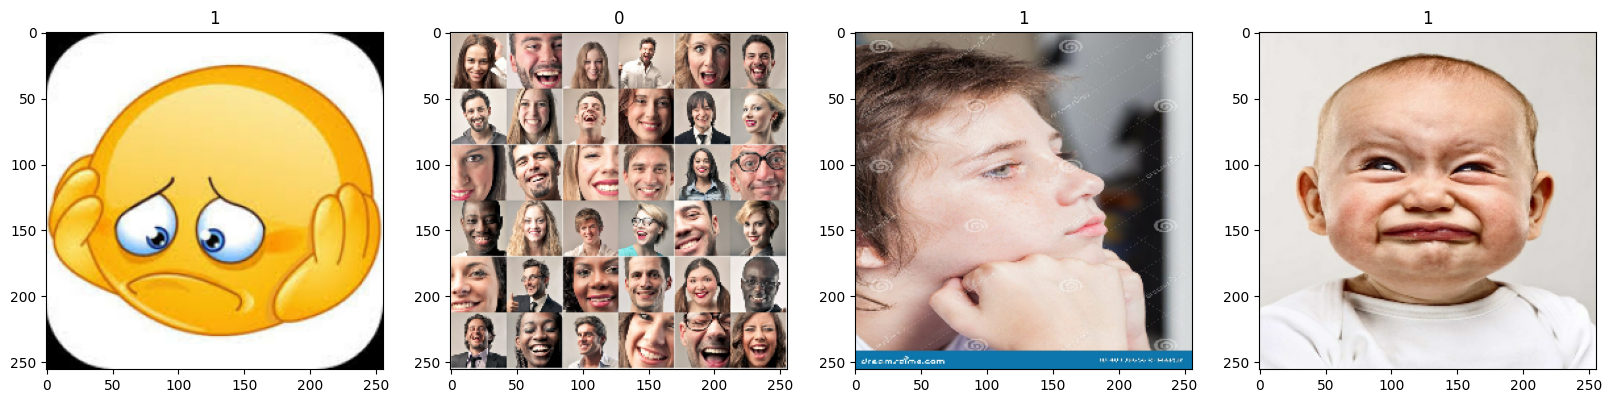

In [36]:
# Visualise loaded data
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale data

In [58]:
data = data.map(lambda x,y: (x/255, y))

In [59]:
scaled_iterator = data.as_numpy_iterator()

In [60]:
batch = scaled_iterator.next()

In [63]:
batch[0].min(), batch[0].max()

(0.0, 1.0)

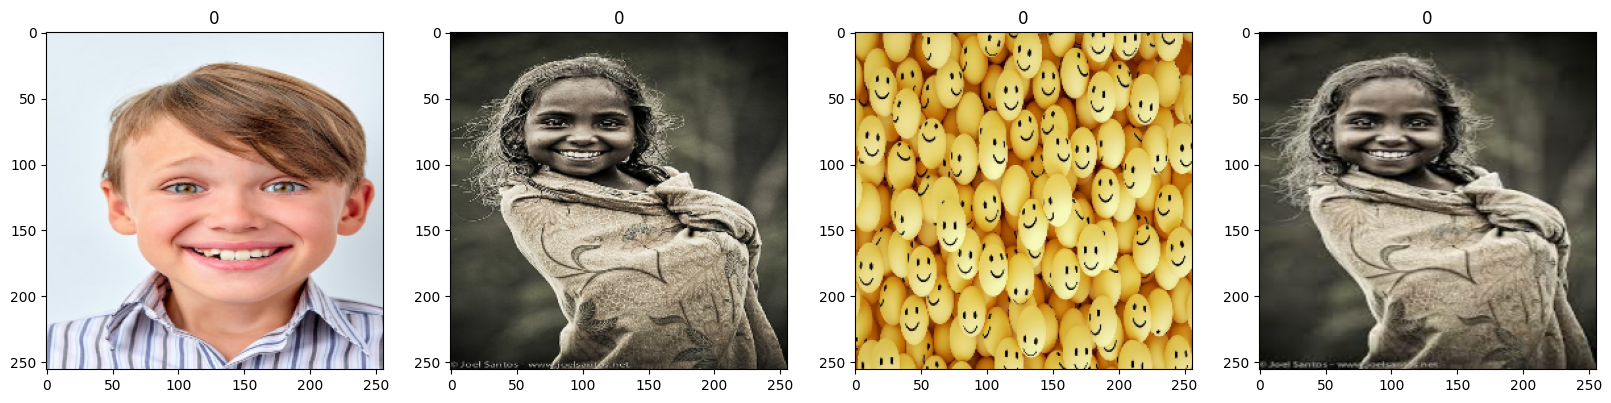

In [64]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

 # Split Data

In [65]:
len(data)

6

In [70]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [73]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Build Deep Learning Model